5-1 들어가며 <br>
5-2 로이터 뉴스 데이터 (1)데이터 확인하기 <br>
5-3 로이터 뉴스 데이터 (2)데이터 복원하기 <br>
5-4 벡터화 하기 <br>
5-5 나이브 베이즈 분류기 <br>
5-6 F1-Score, Confusion Matrix <br>
5-7 다양한 머신러닝 모델 사용해보기 (1) <br>
5-8 다양한 머신러닝 모델 사용해보기 (2) <br>

### 5-1 들어가며

텍스트분류(Text Classification)이란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크이다. 이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높다. <br>

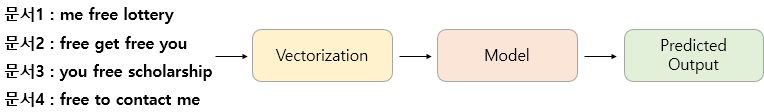 <br>

딥러닝이 아닌 머신러닝 알고리즘을 사용해서 텍스트를 분류해 보겠음.<br>
텍스트 분류에는 여러 종류가 있는데, 그 중 대표적인 것으로는 Binary Classification과 클래스가 3개 이상인 경우인 다중 클래스 분류(Multicalss Classification)이 있음. 메일이 스팸인지 아닌지를 결정하는 스팸 메일 분류기가 이진 분류의 대표적인 예이다.<br><br>


### 5-2 로이터 뉴스데이터 (1) 데이터 확인하기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


#### 훈련 데이터와 테스트 데이터 로드하기

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


num_words는 데이터에서 빈도수 기준으로 상위 몇번째 단어까지 사용할것인지 조절한다. 각 단어는 고유한 번호가 정해져 있는 상태이고 이를 통해서 사용할 단어의 수를 정한다. 


이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있습니다. 예를 들어서 50번 단어보다는 10번 단어가 데이터 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어입니다. 위에서 num_words=10000은 1~10,000번 단어만 사용한다는 의미입니다. 등장 빈도수가 높은 단어들만 사용하겠다는 의미지요.

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


숫자 시퀀스가 출력, 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었는데, 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력된다. (대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈이다.)

In [5]:
print(y_train[0])
print(y_test[0])

3
3


둘 다 숫자 3이 출력됨. 각 뉴스는 정수로 된 레이블을 가지고 있음. 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있다.

In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


#### 데이터 분포 확인하기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


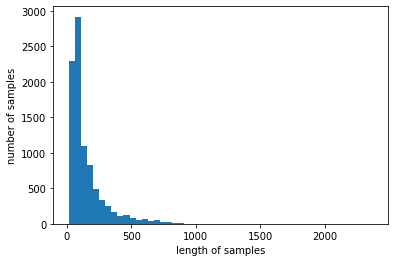

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

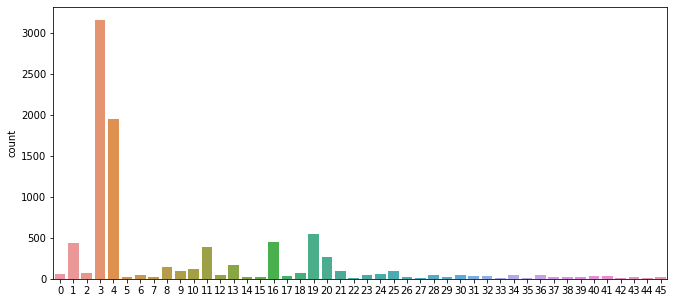

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


해석하자면) <br>
3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재한다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많다는 의미. 이렇게 각 클래스가 몇 개가 존재하는지도 확인봄.

### 5-3 로이터 뉴스 데이터 (2) 데이터 복원하기
#### 원본 뉴스 데이터로 복원해보기


In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

565248/550378 [==============================] - 0s 0us/step
=3


In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 왜냐하면 0번, 1번, 2번은 사실 자연어 처리에 쓰이는 특별한 토큰들을 위해 맵핑된 번호이기 때문입니다. (각각 <pad>, <sos>, <unk>라는 토큰을 나타냅니다.) <br>
따라서 실제로는 숫자에 3을 더해줘야 단어가 실제로 맵핑된 인덱스 값이 나온다. <br>

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('=3')

=3


In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### OOV문제와 UNK 토큰
기계가 미처 배우지 못한 모르는 단어를 <b>OOV(Out-Of-Vocabulary) 또는 UNK(Unknown)</b> 이라고 표현합니다. 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 <unk>라는 일관된 특별 토큰으로 변환합니다. <br>
    
코드 (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2) 에서 <br>
num_words=10000는 정수 번호가 10,000이 넘는 단어들을 자동으로 <unk> 토큰으로 처리합니다. 로이터 뉴스 데이터에서 <unk>은 정수 2번을 가지도록 약속돼 있으므로 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것입니다.

In [17]:
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded_train.append(t)
    

x_train = decoded_train
print(len(x_train))

8982


In [18]:
#test데이터도 변환해주세요!

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)
    

x_test = decoded_test
print(len(x_test))

2246


In [19]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [20]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

### 5-4 벡터화 하기

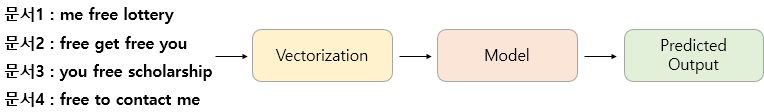 <br><br>


텍스트 데이터가 있을 때, 모델의 입력으로 넣기 위해서는 우선 각 문서를 벡터화할 필요가 있습니다. 항상 그런 것은 아니지만, 일반적으로 텍스트 분류를 할 모델로 인공 신경망을 사용하는 경우, 벡터화 방법 또한 인공 신경망을 사용하는 것이 보편적입니다. Word Embedding, Document Embedding, Contextual Embedding 등의 다양한 벡터화 방법이 존재하는데요. <br>

이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용하겠습니다. 저희가 사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬 <br>

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [22]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않습니다. 그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문입니다. <br>

DTM 행렬을 이어서 TF-IDF 행렬을 만들어보겠습니다. TF-IDF 행렬은 퀴즈 4에서 알아본 DTM의 단점을 보정해 주는 효과를 가지고 있습니다. TF-IDF 행렬에 대한 설명은 아래의 글을 참고하겠습니다. <br>

위키독스: TF-IDF <br>

TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성할 수 있습니다. TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집니다. <br>

In [23]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### 5-5 나이브 베이즈 분류기

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있다.

In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [26]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [27]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [28]:
y_test[3]

4

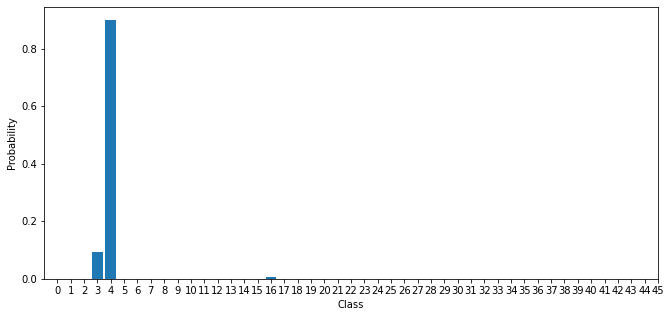

In [29]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [30]:
model.predict(tfidfv_test[3])

array([4])

### 5-6 F1-Score, Confusion Matrix

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


#### Precision, Recall &F1 Score

https://sumniya.tistory.com/26

In [32]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

macro: 단순평균 <br>
weighted: 각 클래스에 속하는 표본의 개수로 가중평균 <br>
accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율 <br>

Confusion Matrix <br>
https://youtu.be/M0GBAzFV9_A <br>

In [33]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


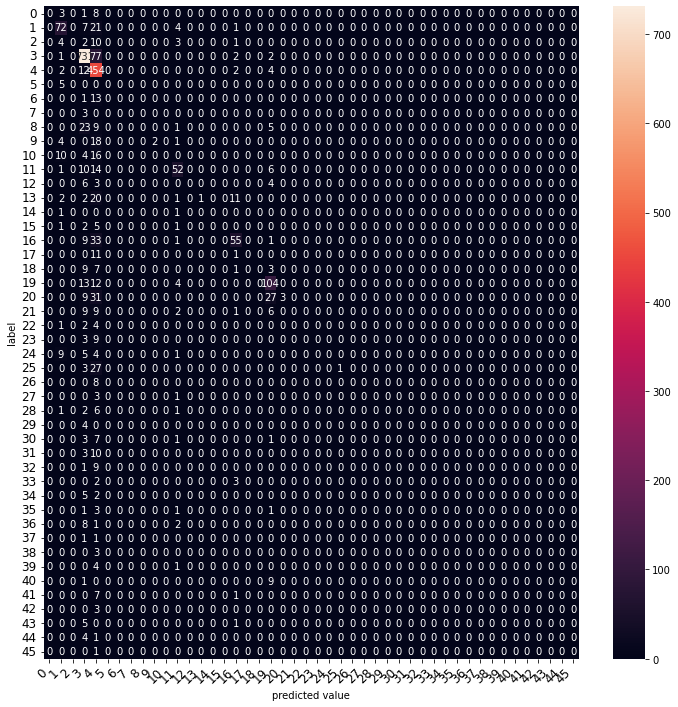

In [34]:
graph_confusion_matrix(model, tfidfv_test, y_test)

### 5-7 다양한 머신러닝 모델 사용해보기(1)

MulttinomialNB로는 약 66%의 정확도 밖에 없음, 클래수의 개수가 46개인 것을 감안해도 그리 좋은 성능은 아니다. 

#### Complement Naive Bayes Classifier(CNB)
데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 <b>컴플리먼트 나이브 베이즈 분류기</b> <br>
컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있습니다. 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋습니다.

In [35]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [36]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


#### 로지스틱 회귀(Logistic Regression)

로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원합니다. 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression) 라고도 합니다. 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점입니다. <br>

소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수입니다. 예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있습니다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률입니다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다. <br><br>

![image.png](attachment:image.png) <br>

In [37]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [38]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8107747105966162


In [39]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [40]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7894033837934105


#### 5-8 다양한 머신러닝 모델 사용해보기 (2) 

#### 결정트리(Decision Tree)
결정 트리는 분류와 회귀 문제에 널리 사용하는 모델이다. 기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오'질문을 이어나가면서 학습한다. 스무고개 놀이랑 비슷하다.

In [41]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [42]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


지금까지의 모델 중 가장 낮은 정확도인 62%를 얻습니다. 사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있습니다. DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있습니다.


#### 랜덤 포레스트 (Random Forest)
<b>앙상블(Ensemble)</b> 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다. 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재한다. 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.

In [43]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state = 0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [44]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


#### 그래디언트 부스팅 트리(GradientBoostingClassifier)


그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. <br>

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋다. <br>

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠르다. <br>

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델이다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있다. <br>

In [45]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


#### Voting(보팅)

투표를 통해 결과를 도출하는 보팅(Voting)이라는 방법.
소프트 보팅은 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최정값을 도출해 낸다. 

In [ ]:
# 12-13분

# 각 분류기 정의
logreg = LogisticRegression(penalty='l2', max_iter=1000, solver='lbfgs')
cnb = ComplementNB()
gboost = GradientBoostingClassifier()


# VotingClassifier 생성 (soft voting)
voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('cnb', cnb),
    ('gboost', gboost)
], voting='soft')

# 모델 훈련
voting_classifier.fit(tfidfv, y_train)

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교